In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [111]:
class Adaline:

    """
    Parameters
    --------------
    lr: float
        Learning rate
    epochs: int
        Number of iterations to train on the data
    random_state: int 
        Random number generator seed for random weight
        initialization

    Attributes
    --------------
    w_ : 1d-array
        weights
    b_ : Scalar 
        bias
    """
    def __init__(self, lr = 0.01, epochs = 50, random_state=1):
        self.lr = lr
        self.epochs = epochs
        self.random_state = random_state
    
    def fit(self, X,y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = 0.0
        self.losses_ = []
        for epoch in range(self.epochs):
            z = self.net_input(X)
            z = self.activation(z)
            error = (y - z)
            dlByDw =  - (X.T.dot(error)) / X.shape[0]
            dlBydB =  - error.mean()
            self.w_ -= self.lr * dlByDw
            self.b_ -= self.lr * dlBydB
            loss = (error**2).mean()
            self.losses_.append(loss)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_)+ self.b_
    
    def activation(self, X):
        return X

    def predict(self,X):
        return np.where(self.activation(self.net_input(X))>=0.5, 1,0)




        


In [112]:
# get the iris data from uci
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [113]:
df = pd.read_csv(s, header=None, encoding='utf-8')

In [114]:
df[4].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

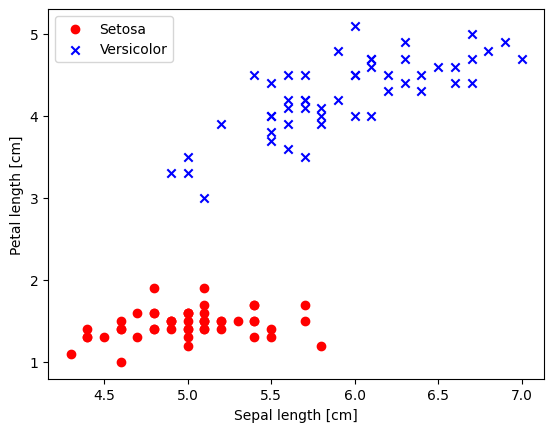

In [115]:
# extract only the setosa and versicolor  //the first 50 are setosa and next fifty are versiColor
y  = df.iloc[0:100, 4].values
y = np.where(y=="Iris-setosa", 0, 1)
X = df.iloc[0:100, [0,2]].values

#plot them
plt.scatter(X[:50, 0], X[:50,1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:, 0], X[50:,1], color='blue', marker='x', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()


In practice, it often requires some experimentation to find a good learning rate, 𝜂𝜂, for optimal con- vergence. So, let’s choose two different learning rates, lr = 0.1 and lr = 0.0001, to start with and plot the loss functions versus the number of epochs to see how well the Adaline implementation learns from the training data.

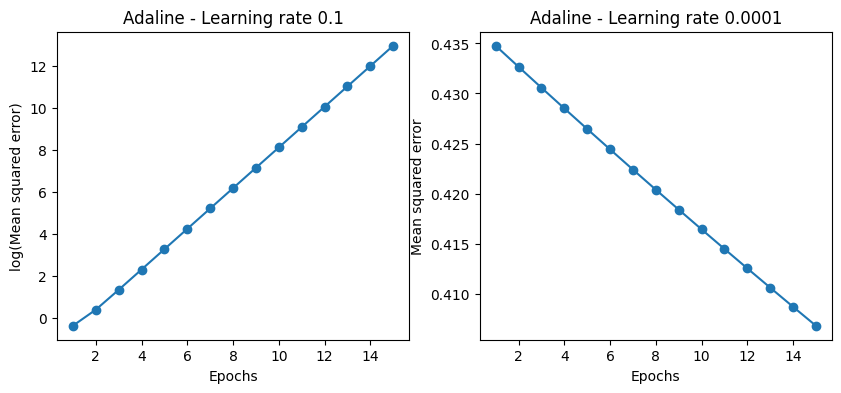

In [131]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4)) 
ada1 = Adaline(epochs=15, lr=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_) + 1),
np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')
ada2 = Adaline(epochs=15, lr=0.0001).fit(X, y) 
ax[1].plot(range(1, len(ada2.losses_) + 1),
ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001') 
plt.show()

As we can see in the resulting loss function plots, we encountered two different types of problems. The left chart shows what could happen if we choose a learning rate that is too large. Instead of minimizing the loss function, the MSE becomes larger in every epoch, because we overshoot the global minimum. On the other hand, we can see that the loss decreases on the right plot, but the chosen learning rate, lr = 0.0001, is so small that the algorithm would require a very large number of epochs to converge to the global loss minimum:

In [100]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

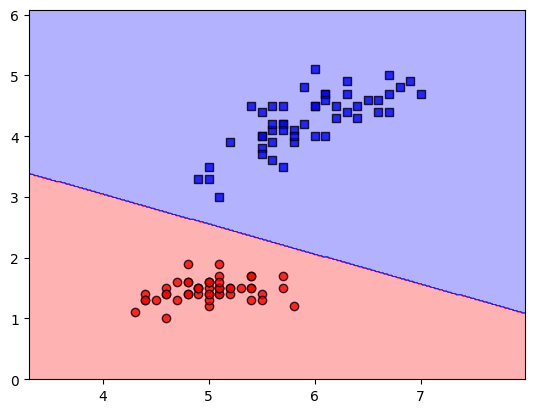

In [132]:
#taking an ideal learning rate
ada3 = Adaline(lr=0.01, epochs=20)
ada3.fit(X,y)
plot_decision_regions(X, y, classifier=ada3)



Text(0.5, 1.0, 'Adaline - Learning rate 0.01')

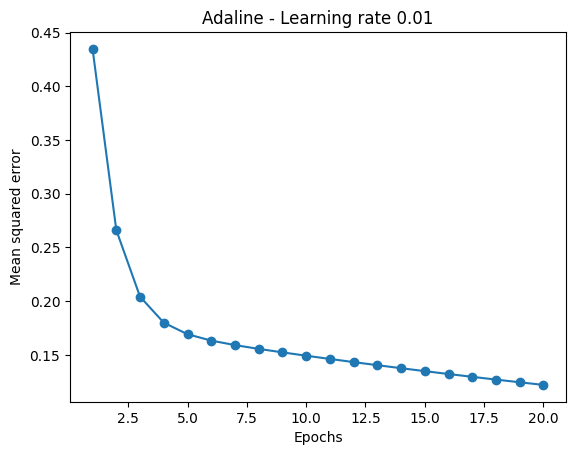

In [134]:
plt.plot(range(1, len(ada3.losses_) + 1),
ada3.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')
plt.title('Adaline - Learning rate 0.01')

## We will use a feature scaling method called standardization. 
This normalization procedure helps gradient descent learning to converge more quickly.
The equation is as follows:
$$
x_{j}' = \frac{{x_{j} - u_{j}}}{{\mu_{j}}}
$$

One of the reasons why standardization helps with gradient descent learning is that it is easier to find a learning rate that works well for all weights (and the bias). If the features are on vastly different scales, a learning rate that works well for updating one weight might be too large or too small to update the other weight equally well. Overall, using standardized features can stabilize the training such that the optimizer has to go through fewer steps to find a good or optimal solution (the global loss minimum).

In [135]:
# Standardize the inputs
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean())/X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean())/X[:,1].std()


In [136]:
ada_gd = Adaline(lr=0.5, epochs=20)
ada_gd.fit(X_std,y)

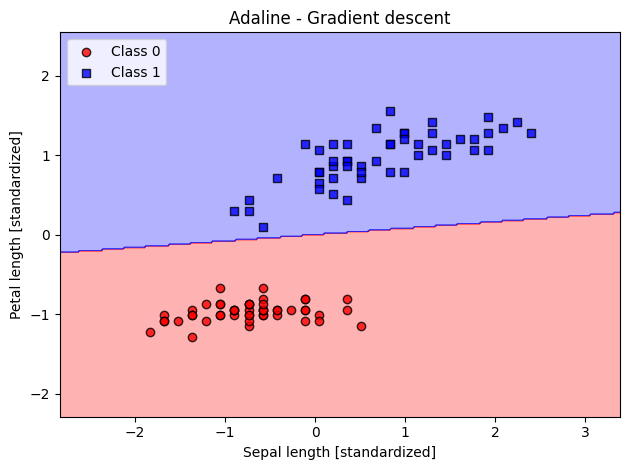

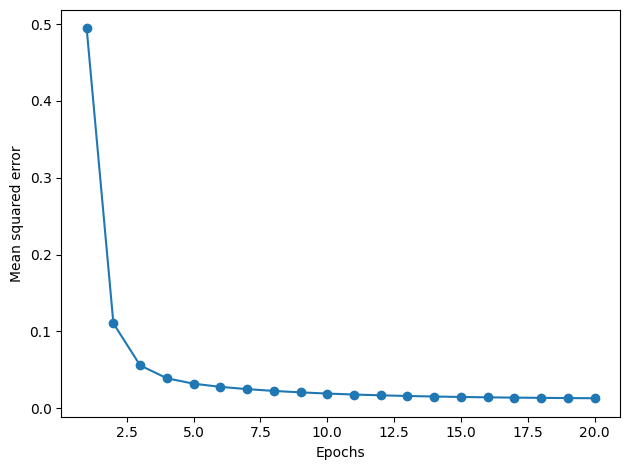

In [137]:
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_gd.losses_) + 1),ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')
plt.tight_layout()
plt.show()

In conclusion, We can observe that it takes lesser epochs to converge to the global minima when we apply standard minimization